In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
from nltk.corpus import stopwords
from nltk.stem.snowball import EnglishStemmer
import string

In [3]:
stop = stopwords.words('english')
punctuation = string.punctuation

In [113]:
def remove_stopwords_sentence(sentence):
    # print(sentence)
    return pd.Series([word for word in sentence[0].split() if word not in stop])


def remove_stopwords_df(df):
    return df.apply(remove_stopwords_sentence, axis=1)


def stem_sentence(s):
    stemmer = EnglishStemmer()
    return pd.Series([stemmer.stem(w) for w in s if not pd.isna(w)]).to_frame().apply(' '.join, axis=0)[0]

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer

prep_pipeline = Pipeline(steps=[
    ('remove \n', FunctionTransformer(pd.DataFrame.replace,
                                      kw_args={'to_replace': '\n', 'value': ' ', 'regex': True})),
    ('remove numbers', FunctionTransformer(pd.DataFrame.replace,
                                           kw_args={'to_replace': '\d', 'value': '', 'regex': True})),
    ('remove html tags', FunctionTransformer(pd.DataFrame.replace,
                                             kw_args={'to_replace': '<.*?>', 'value': '', 'regex': True})),
    ('lower', FunctionTransformer(lambda x: x.squeeze(axis=1).str.lower().to_frame())),
    ('remove punctuation', FunctionTransformer(lambda x: x.squeeze(
        axis=1).str.replace('[{}]'.format(punctuation), '').to_frame())),
    ('remove stopwords', FunctionTransformer(remove_stopwords_df, validate=False)),
    ('stemming', FunctionTransformer(pd.DataFrame.apply, kw_args={
     'func': stem_sentence, 'axis': 1}, validate=False)),
    ('vectorizer', TfidfVectorizer(lowercase=False, analyzer='word',
                                   preprocessor=None, tokenizer=lambda i: i.split()))
])

In [26]:
df_train = pd.read_csv(
    'D:/OP/P8/jigsaw-toxic-comment-classification-challenge/train.csv')

In [27]:
target = df_train.toxic + df_train.obscene + df_train.insult + \
    df_train.threat * 1.5 + df_train.severe_toxic * 2 + df_train.identity_hate*2

In [29]:
df_train['target'] = target

In [8]:
validation_data = pd.read_csv(
    'D:/OP/P8/jigsaw-toxic-severity-rating/validation_data.csv')

In [9]:
comments_to_score = pd.read_csv(
    'D:/OP/P8/jigsaw-toxic-severity-rating/comments_to_score.csv')

In [ ]:
# Create the folds and save them
n_folds = 7
n = (df_prep['target'] > 0).sum()
for fld in range(n_folds):
    print(f'Fold: {fld}')
    tmp_df = pd.concat([df_prep[df_prep.target > 0].sample(frac=1, random_state=10*(fld+1)),
                        df_prep[df_prep.target == 0].sample(n, random_state=10*(fld+1))], axis=0)

    tmp_df.to_csv('D:/OP/P8/df_fld'+str(fld)+'.csv', index=False)
    print(tmp_df.shape)
    print(tmp_df['target'].value_counts())

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestRegressor

In [115]:
# apply a model on each fold
n_folds = 1
n = (df_train['target'] > 0).sum()
val_preds_arr1 = np.zeros((validation_data.shape[0], n_folds))
val_preds_arr2 = np.zeros((validation_data.shape[0], n_folds))
test_preds_arr = np.zeros((comments_to_score.shape[0], n_folds))

for fld in range(n_folds):
    print("\n\n")
    print(
        f' ****************************** FOLD: {fld} ******************************')

    print(f'Fold: {fld}')
    tmp_df = pd.concat([df_train[df_train.target > 0].sample(frac=1, random_state=10*(fld+1)),
                        df_train[df_train.target == 0].sample(n, random_state=10*(fld+1))], axis=0)

    #df = pd.read_csv('D:/OP/P8/df_fld'+str(fld)+'.csv')
    print(df.shape)

    features = FeatureUnion([
        ("tfidf", TfidfVectorizer(lowercase=False)),
    ])
    pipeline = Pipeline(
        [
            ('prep', prep_pipeline),
            #("features", features),
            ("clf", RandomForestRegressor(n_estimators=10)),
            #("clf", Ridge()),
            # ("clf",LinearRegression())
        ]
    )
    print("\nTrain:")
    # Train the pipeline
    pipeline.fit(tmp_df['comment_text'].to_frame(), tmp_df['target'])




 ****************************** FOLD: 0 ******************************
Fold: 0
(32450, 2501)

Train:


C:\Users\elodi\AppData\Local\Temp/ipykernel_5988/2379686249.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  ('remove punctuation', FunctionTransformer(lambda x: x.squeeze(
C:\Users\elodi\AppData\Local\Temp/ipykernel_5988/139863107.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series([word for word in sentence[0].split() if word not in stop])
C:\Users\elodi\AppData\Local\Temp/ipykernel_5988/139863107.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series([stemmer.stem(w) for w in s if not pd.isna(w)]).to_frame().apply(' '.join, axis=0)[0]


In [104]:
tfidf = TfidfVectorizer(tokenizer=lambda i: i.split(), lowercase=False)
tfidf.fit_transform(a[0])

<10x139 sparse matrix of type '<class 'numpy.float64'>'
	with 165 stored elements in Compressed Sparse Row format>

In [105]:
tfidf.vocabulary_

{'explan': 38,
 'edit': 30,
 'made': 64,
 'usernam': 123,
 'hardcor': 48,
 'metallica': 72,
 'fan': 40,
 'revert': 93,
 'werent': 130,
 'vandal': 125,
 'closur': 18,
 'gas': 44,
 'vote': 126,
 'new': 75,
 'york': 137,
 'doll': 27,
 'fac': 39,
 'pleas': 82,
 'dont': 28,
 'remov': 90,
 'templat': 113,
 'talk': 112,
 'page': 80,
 'sinc': 101,
 'im': 52,
 'retir': 92,
 'daww': 25,
 'match': 67,
 'background': 11,
 'colour': 20,
 'seem': 97,
 'stuck': 107,
 'thank': 114,
 'januari': 58,
 'utc': 124,
 'hey': 50,
 'man': 66,
 'realli': 86,
 'tri': 119,
 'war': 128,
 'guy': 47,
 'constant': 22,
 'relev': 88,
 'inform': 55,
 'instead': 56,
 'care': 16,
 'format': 43,
 'actual': 1,
 'info': 54,
 'cant': 15,
 'make': 65,
 'real': 85,
 'suggest': 111,
 'improv': 53,
 'wonder': 132,
 'section': 96,
 'statist': 105,
 'later': 61,
 'subsect': 110,
 'type': 121,
 'accid': 0,
 'think': 116,
 'refer': 87,
 'may': 69,
 'need': 74,
 'tidi': 117,
 'exact': 36,
 'ie': 51,
 'date': 24,
 'etc': 34,
 'noon': 7

In [75]:
prep_pipeline.fit_transform(tmp_df['comment_text'].to_frame())

C:\Users\elodi\AppData\Local\Temp/ipykernel_5988/1187289824.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  ('remove punctuation', FunctionTransformer(lambda x: x.squeeze(
C:\Users\elodi\AppData\Local\Temp/ipykernel_5988/4181562066.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series([word for word in sentence[0].split() if word not in stop])
C:\Users\elodi\AppData\Local\Temp/ipykernel_5988/4181562066.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series([stemmer.stem(w) for w in s if not pd.isna(w)]).apply(' '.join)


,0,1,2,3,4,5,6,7,8,9,...,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249
141267,g a y,n i g g e r,g o d,d a m n d d,g a y,n i g g e r,f u c k,f u c k,s h t a y,a w a y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157888,w a r n,a n o t h,e d i t o r,p o l i c,b l o c k,l i k e,g r a f i t t i,a n y o n,d o n e,w h i m,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36826,c,i s n t,l o g o g r a m,l i k e,r e l i g i,i d i o t,i n s i s t,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75592,b l o c k,d e t e r,m a y,b l o c k,s t i l l,a s s h o l,c o w a r d,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148600,a r t i c l,a l r e a d i,b a d,e n o u g h,d o n t,m a k e,w o r s,s t u p i d,d e l e t,p i c t u r,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104285,a n y o n,i n t e r e s t,a c c u r,d e l i b e r,m i s l e a d,i n f o r m,t e n s t r,g u i t a r,i e,g a r b a g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151621,u t c,t h a n k,t h i n k,b w v,g a,o n e,b a c h,f a v o u r i t,w r o n g,s e a s o n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129774,s u g g e s t,w r i t e,a r t i c l,b e c o m,a d m i n,s a v e,w o r k,h a,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105815,t h a n k,d i d n t,m e a n,a n y t h,p e r h a p,f a l s,s t r o n g,w o r d,i n a c c u r,p o s t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
# What are the important features for toxicity

feature_wts = sorted(list(zip(pipeline['prep']['vectorizer'].get_feature_names(),
                              np.round(pipeline['clf'].feature_importances_, 2))),
                     key=lambda x: x[1],
                     reverse=True)

print(feature_wts[:30])

[('fuck', 0.29), ('suck', 0.04), ('bitch', 0.03), ('faggot', 0.03), ('shit', 0.03), ('ass', 0.02), ('asshol', 0.02), ('gay', 0.02), ('nigger', 0.02), ('articl', 0.01), ('bastard', 0.01), ('cunt', 0.01), ('dick', 0.01), ('die', 0.01), ('fucker', 0.01), ('fuckin', 0.01), ('go', 0.01), ('idiot', 0.01), ('kill', 0.01), ('motherfuck', 0.01), ('stupid', 0.01), ('u', 0.01), ("''has''", 0.0), ("'neue", 0.0), ("'strakh'", 0.0), ('\\', 0.0), ('\\\\', 0.0), ('\\\\hore', 0.0), ('\\anamorphism\\', 0.0), ('\\caint', 0.0)]


In [ ]:
print("\npredict validation data ")
val_preds_arr1[:, fld] = pipeline.predict(
    validation_data['less_toxic'].to_frame())
val_preds_arr2[:, fld] = pipeline.predict(
    validation_data['more_toxic'].to_frame())

print("\npredict test data ")
test_preds_arr[:, fld] = pipeline.predict(comments_to_score['text'].to_frame())

In [124]:
(val_preds_arr1[:, fld] < val_preds_arr2[:, fld]).sum() / \
    validation_data.shape[0]

0.665703467516939

In [126]:
test_pred = pipeline.predict(comments_to_score['text'].to_frame())

C:\Users\elodi\AppData\Local\Temp/ipykernel_5988/2379686249.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  ('remove punctuation', FunctionTransformer(lambda x: x.squeeze(


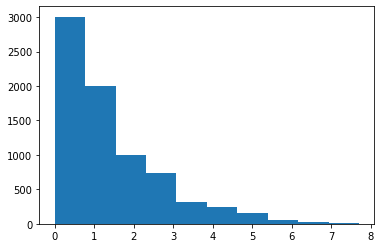

In [129]:
plt.hist(test_pred)
plt.show()

In [130]:
test_pred.shape

(7537,)

In [131]:
submission = pd.read_csv(
    'D:/OP/P8/jigsaw-toxic-severity-rating/sample_submission.csv')

In [132]:
submission.shape

(7537, 2)

In [134]:
submission["score"] = test_pred

In [135]:
submission

,comment_id,score
0,114890,0.5
1,732895,0.0
2,1139051,0.0
3,1434512,0.1
4,2084821,1.5
...,...,...
7532,504235362,1.1
7533,504235566,0.7
7534,504308177,0.4
7535,504570375,2.2


In [137]:
submission.to_csv(
    'D:/OP/P8/jigsaw-toxic-severity-rating/sample_submission_1.csv')